# Polynomial Regression on Random Values


## Polynomial Regression 

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y


#### Further Reference [Click Here](https://en.wikipedia.org/wiki/Polynomial_regression)

![Poly](Images/Polynomial_Regression.gif)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

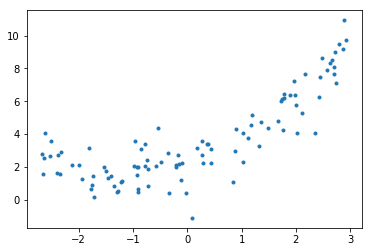

In [2]:
#Let's look at the following example
import numpy as np
m = 100
X= 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

import matplotlib.pyplot as plt
plt.plot(X,y,'.')

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
reg.score(X_test,Y_test)

0.6032492213239631

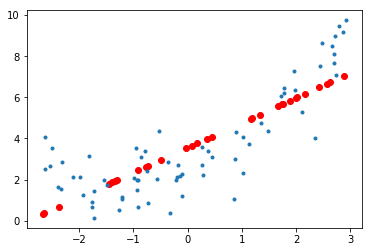

In [5]:
plt.scatter(X_test,Y_pred,color = 'r')
plt.plot(X_train,Y_train,'.')

We can see that the straight line is unable to capture the patterns in the data. This is an example of **under-fitting**.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)

X_poly = poly_features.fit_transform(X)

In [7]:
X[0]

array([-2.64905042])

In [8]:
X_poly[0]

array([-2.64905042,  7.01746815])

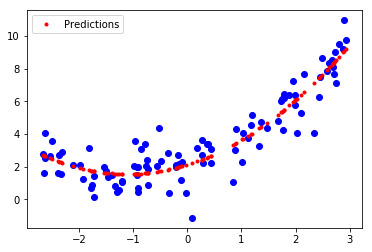

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)

plt.scatter(X, y, color = 'blue')

plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)),'.',color = 'r',label = 'Predictions')
plt.legend()

In [10]:
print('C:',lin_reg.intercept_,'A: ',lin_reg.coef_[0][1],'B:',lin_reg.coef_[0][0])

C: [2.12690149] A:  0.47017793620363607 B: 1.0394659015836516


In [11]:
lin_reg.score(X_poly, y)

0.8459978117318867